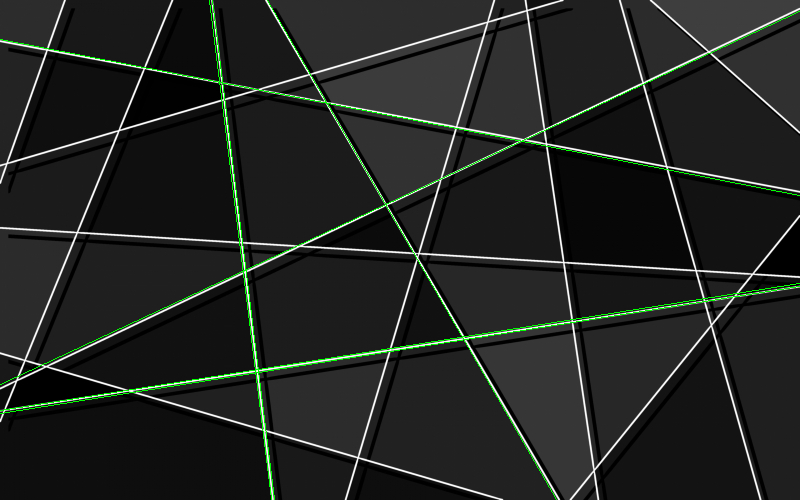

In [34]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/lines.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray,(5,5),0) 
edges = cv2.Canny(gray,90,150,apertureSize = 3)

# ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# kernel = np.ones((6,6),np.uint8)

# closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

lines = cv2.HoughLines(edges, 1, np.pi/180, 280)

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 1)

cv2_imshow(img)
# cv2_imshow(thresh)

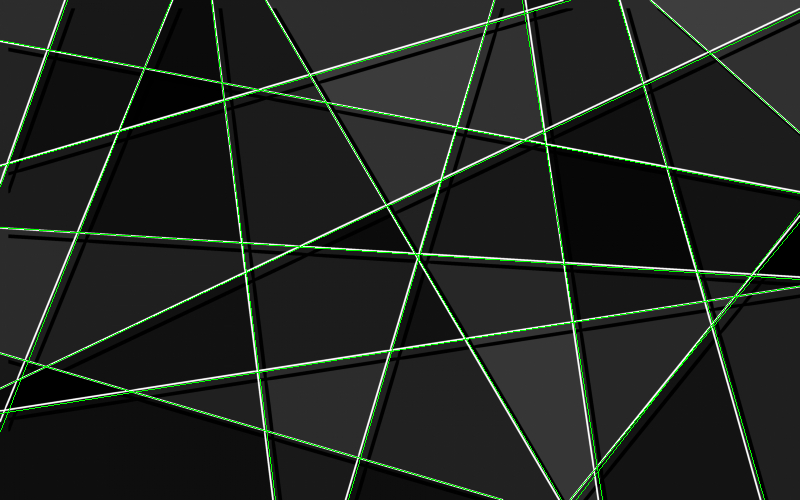

In [38]:
import cv2
import copy
from google.colab.patches import cv2_imshow
import numpy as np

img = cv2.imread('/content/lines.jpg')
#cv2_imshow(img)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray,(5,5),0) # убираем случайные шумы
edges = cv2.Canny(gray,200,250,apertureSize = 3) #получаем границы
#cv2_imshow(edges)

kernel = np.ones((6,6),np.uint8)
closing_1 = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
#cv2_imshow(closing_1)

kernel = np.ones((2,2), np.uint8)
erosion_1 = cv2.erode(closing_1, kernel, iterations = 1)
#cv2_imshow(erosion_1)

lines = cv2.HoughLines(erosion_1,1,np.pi/100,190)
multiplier = 1000
for line in lines:
  [rho, theta] = line[0]
  a = np.cos(theta)
  b = np.sin(theta)
  x0 = a*rho
  y0 = b*rho
  x1 = int(x0 + multiplier*(-b))
  y1 = int(y0 + multiplier*(a))
  x2 = int(x0 - multiplier*(-b))
  y2 = int(y0 - multiplier*(a))
  cv2.line(img,(x1,y1),(x2,y2),(0,255,0),1)

cv2_imshow(img)

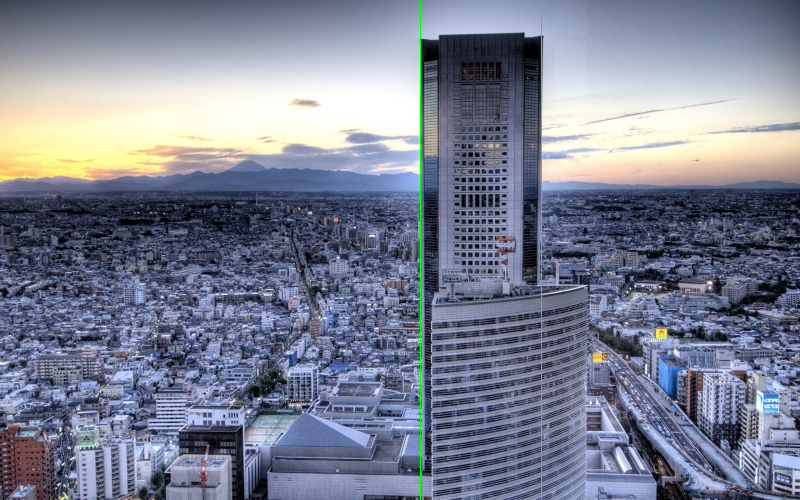

In [39]:
import cv2
import copy
from google.colab.patches import cv2_imshow
import numpy as np

img = cv2.imread('/content/skyskeb_one.jpg')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray,(7,7),0) # убираем случайные шумы
edges = cv2.Canny(gray,200,250,apertureSize = 3) #получаем границы
#второй параметр ро (разрешение по расстаянию в пикселях)
#последний параметр - порог голосов
lines = cv2.HoughLines(edges,1,np.pi/1,50)
multiplier = 1000
for line in lines:
  [rho, theta] = line[0]
  a = np.cos(theta)
  b = np.sin(theta)
  x0 = a*rho
  y0 = b*rho
  x1 = int(x0 + multiplier*(-b))
  y1 = int(y0 + multiplier*(a))
  x2 = int(x0 - multiplier*(-b))
  y2 = int(y0 - multiplier*(a))
  cv2.line(img,(x1,y1),(x2,y2),(0,255,0),1)

cv2_imshow(img)

(3, 38, 34)


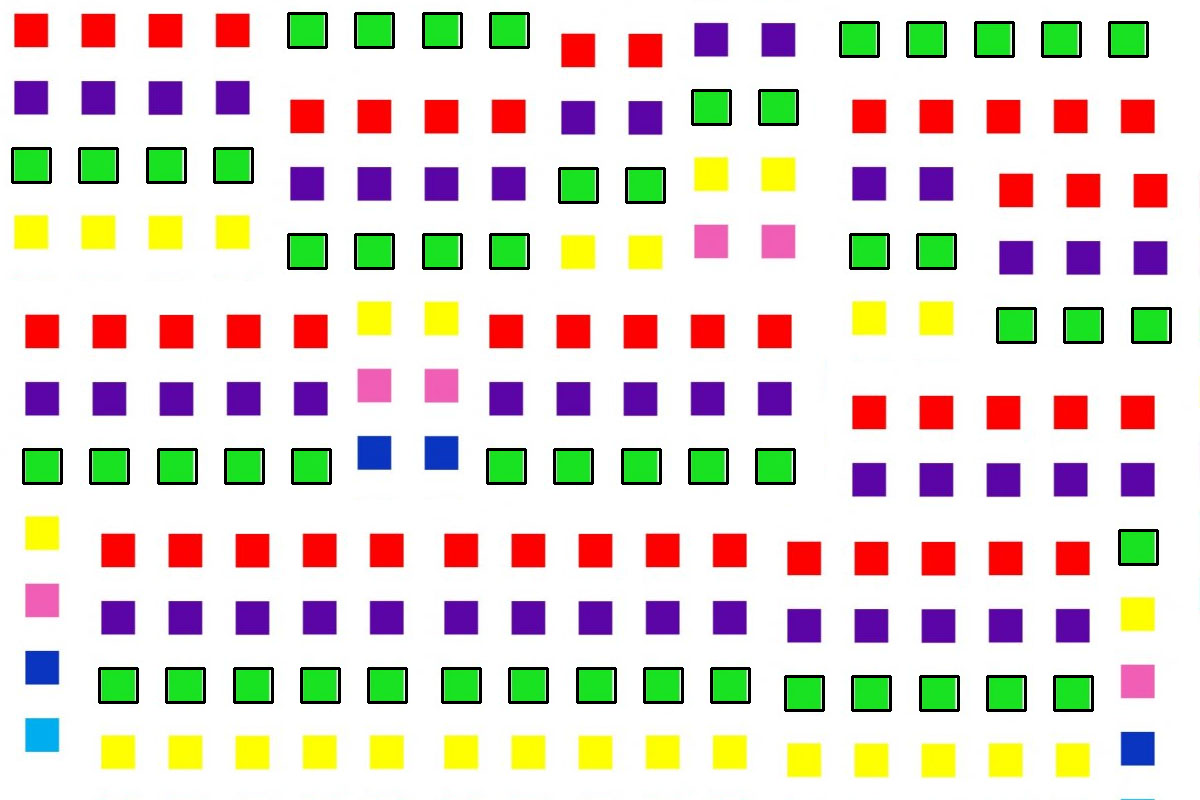

52


In [61]:
img_rgb = cv2.imread('/content/square_many2.jpg')
# img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('/content/cube.png')
print(template.shape[::-1])
_,w, h = template.shape[::-1]
res = cv2.matchTemplate(img_rgb,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.86
loc = np.where( res >= threshold)
count=0
for pt in zip(*loc[::-1]):
  cv2.rectangle(img_rgb, pt, (pt[0]+w, pt[1]+h), (0,0,0), 2)
  count+=1
cv2_imshow(img_rgb)
print(count)